# PAGA for COVID-19 Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scanpy

     |████████████████████████████████| 10.3MB 8.7MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
     |████████████████████████████████| 133kB 52.6MB/s 
     |████████████████████████████████| 1.2MB 35.2MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=2671ea8a792bfe9e1644f26555f8a93c7e4102521681f5ca4f6cd1582a7f5331
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for sinfo: filename=sinfo-0.3.4-cp37-none-any.whl size=7899 sha256=d9ffcce9a6f697e8989818864ac91514f383d9e579c4774d01c102e809b0a8ee
  Stored in directory: /root/.cache/pip/wheels/43/a4/e5/d4e0a170ccc134e509ea55acad7845f0fdfa62b964e430f0e3
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=48cd076d69f452bf55540fe1726e11f9a662e49e4b6fe02f5bf6f3ed55dcab2a
  Stored in directory: /root/.cache/pip/wh

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as pl
from scipy.stats import mode
from collections import Counter

sc.settings.verbosity = 3
sc.set_figure_params(color_map='viridis')
sc.logging.print_versions()
#results_file = './write/nestorowa.h5ad'
#results_file_denoised = './write/nestorowa_denoised.h5ad'

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                         7.1.2
astor                       0.8.1
bottleneck                  1.3.2
cached_property             1.5.2
cffi                        1.14.5
cloudpickle                 1.3.0
cycler                      0.10.0
cython_runtime              NA
dask                        2.12.0
dateutil                    2.8.1
debugpy                     1.0.0
decorator                   4.4.2
get_version                 2.2
google   

In [ ]:
# gene expression
adata = sc.read('/content/drive/MyDrive/covid/swab_gene_counts_final.txt', cache=True)
adata

... writing an h5ad cache file to speedup reading next time


AnnData object with n_obs × n_vars = 234 × 15979

In [ ]:
adata.raw = adata
sc.pp.recipe_weinreb17(adata, log=False)
sc.tl.pca(adata)

computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    with n_comps=50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:00)


In [ ]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [ ]:
sc.tl.draw_graph(adata, layout='fa', random_state=1)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:00)


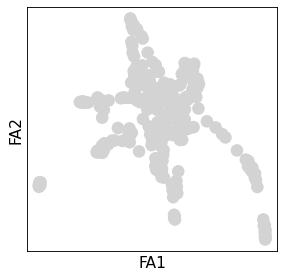

In [ ]:
sc.pl.draw_graph(adata)

In [ ]:
adata_denoised = adata.copy()
sc.tl.diffmap(adata_denoised)
sc.pp.neighbors(adata_denoised, n_neighbors=10, use_rep='X_diffmap')

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.9959649  0.98650706 0.9823078  0.9799226
     0.97696584 0.9734004  0.9656543  0.960668   0.9466017  0.9448946
     0.9391128  0.93505245 0.92717266]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


## Clustering 

In [ ]:
adata = adata_denoised

Cluster the denoised graph.

In [ ]:
!pip install igraph

     |████████████████████████████████| 122kB 7.7MB/s 


In [ ]:
!pip install leidenalg

     |████████████████████████████████| 1.4MB 6.9MB/s 
     |████████████████████████████████| 3.2MB 29.7MB/s 


In [ ]:
sc.tl.leiden(adata, resolution=1)
print('clustering done')

running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


clustering done


Embed the denoised graph.

In [ ]:
sc.tl.draw_graph(adata, layout='fa', random_state=1)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:00)


In [ ]:
adata

AnnData object with n_obs × n_vars = 234 × 216
    obs: 'leiden'
    uns: 'pca', 'neighbors', 'draw_graph', 'diffmap_evals', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

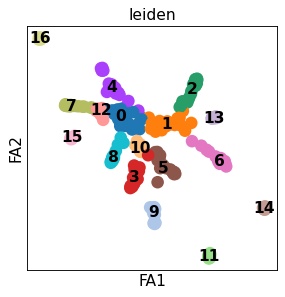

In [ ]:
sc.pl.draw_graph(adata, color=['leiden'], legend_loc='on data')

In [ ]:
adata.obs['clusters'] = adata.obs['leiden']

In [ ]:
adata.obs['clusters']

RR057e_00202     4
RR057e_00080     0
RR057e_00287     0
RR057e_00753    12
RR057e_00751     5
                ..
RR057e_00721     8
RR057e_00731     8
RR057e_00728     8
RR057i_00067    12
RR057i_00116    11
Name: clusters, Length: 234, dtype: category
Categories (17, object): ['0', '1', '2', '3', ..., '13', '14', '15', '16']

### PAGA

In [ ]:
sc.tl.paga(adata, groups='clusters')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


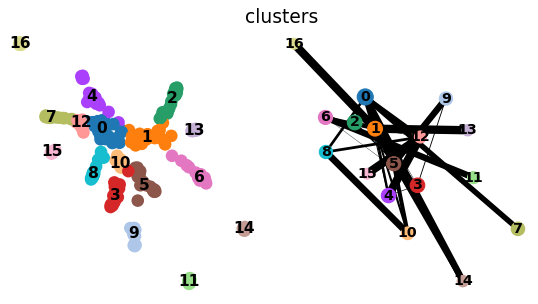

In [ ]:
sc.pl.paga_compare(adata, basis='X_draw_graph_fa')

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga', maxiter=50)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:00)


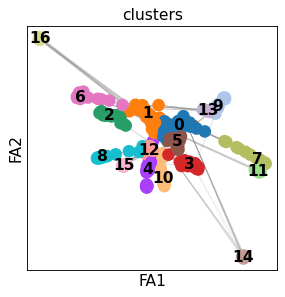

In [ ]:
sc.pl.draw_graph(adata, color='clusters', legend_loc='on data', edges=True)

--> added 'pos', the PAGA positions (adata.uns['paga'])


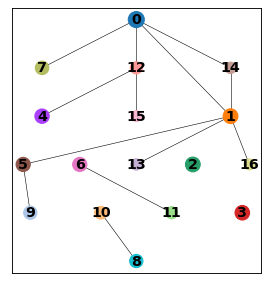

In [ ]:
sc.pl.paga(adata, threshold=0.5, show=False, layout = 'eq_tree', max_edge_width=0.5)

Marker Genes Identification

ranking genes
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9
    finished: added to `.uns['rank_genes_groups_ttest']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:416: Ru

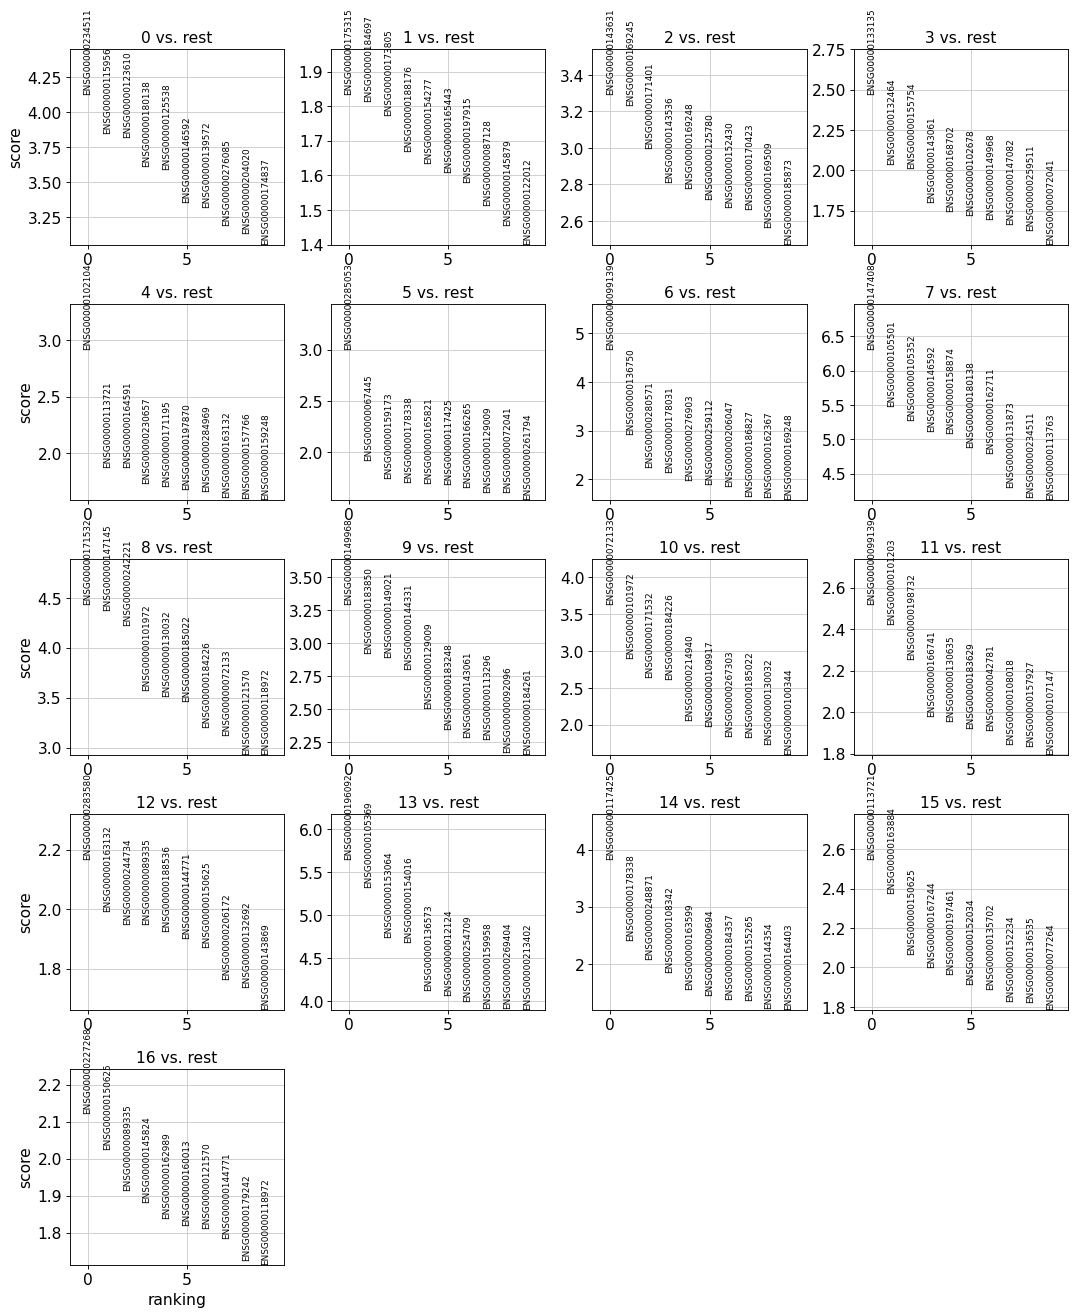

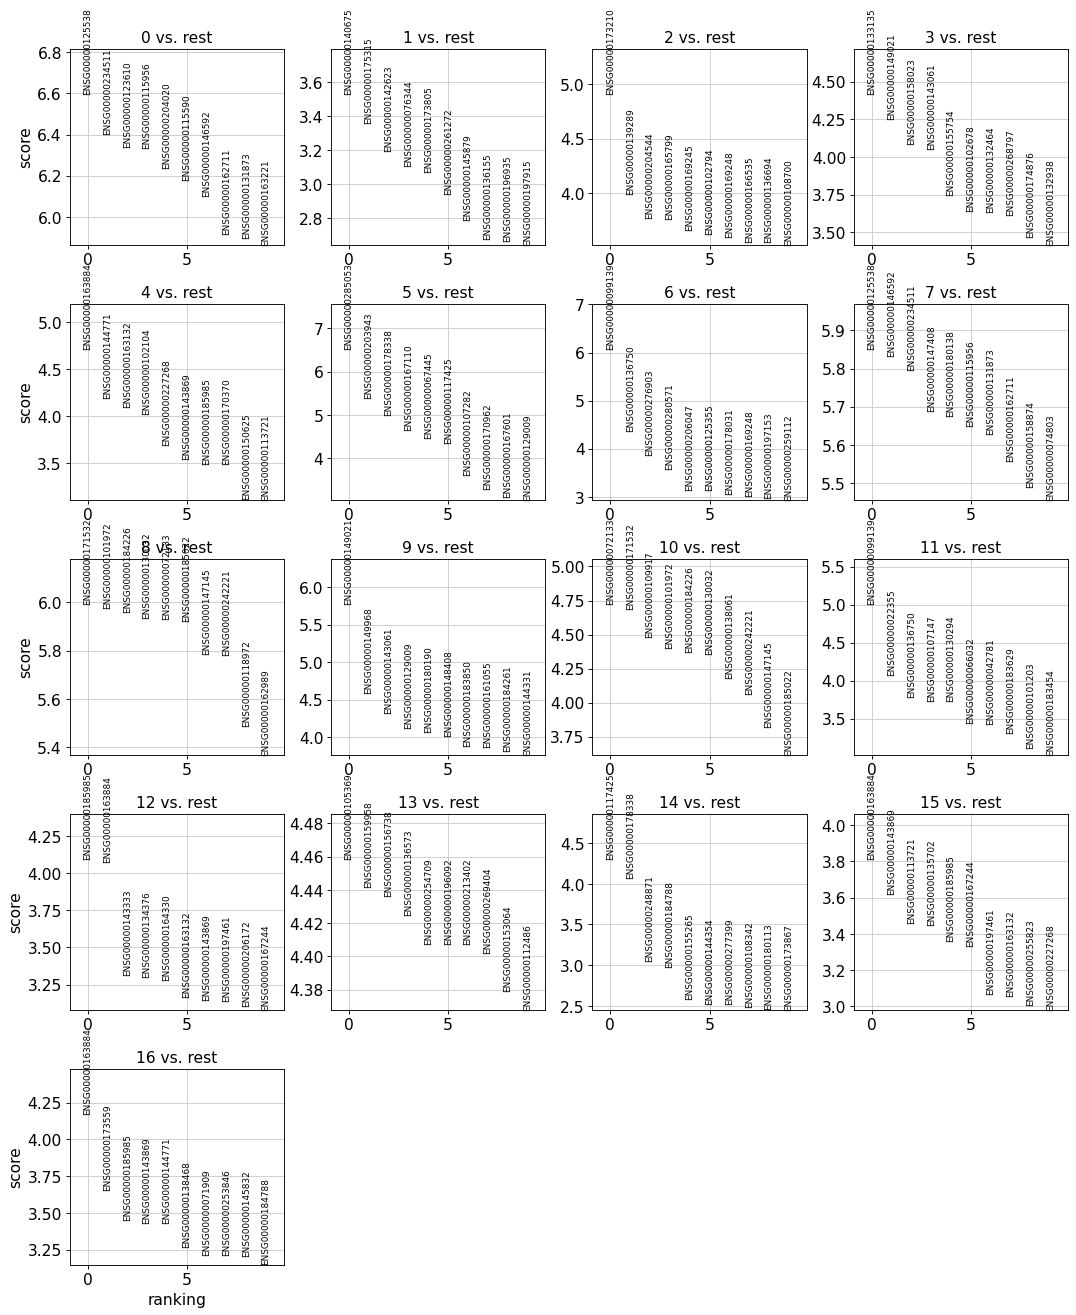

In [ ]:
n_genes = 10
show_plot = True
sc.tl.rank_genes_groups(
    adata,
    "leiden",
    method="t-test",
    use_raw=True,
    key_added="rank_genes_groups_ttest",
    n_genes=n_genes,
)
sc.tl.rank_genes_groups(
    adata,
    "leiden",
    method="wilcoxon",
    use_raw=True,
    key_added="rank_genes_groups_wilcox",
    n_genes=n_genes,
)
sc.pl.rank_genes_groups(
    adata, key="rank_genes_groups_ttest", sharey=False, n_genes=n_genes, show=show_plot
)
sc.pl.rank_genes_groups(
    adata, key="rank_genes_groups_wilcox", sharey=False, n_genes=n_genes, show=show_plot
)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


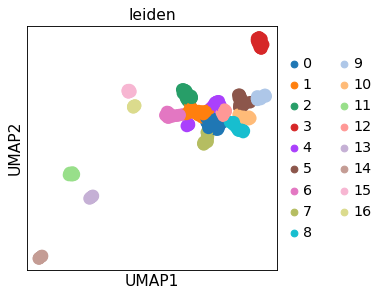

In [ ]:
n_genes = 10
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"], ncols=1, show=show_plot)

In [ ]:
def transpose(l1, l2): 
  
    # iterate over list l1 to the length of an item  
    for i in range(len(l1[0])): 
        # print(i) 
        row =[] 
        for item in l1: 
            # appending to new list with values and index positions 
            # i contains index position and item contains values 
            row.append(item[i]) 
        l2.append(row) 
    return l2 

In [ ]:
c = adata.uns['rank_genes_groups_wilcox']
s = c['names'].tolist()

l2 = [] 
s2 = transpose(s, l2)

hvgs = []
for i in s2:
    p = []
    t=0
    while(t<1):
        p.append(i[t])
        t=t+1
    hvgs.extend(p)

Top genes for clusters


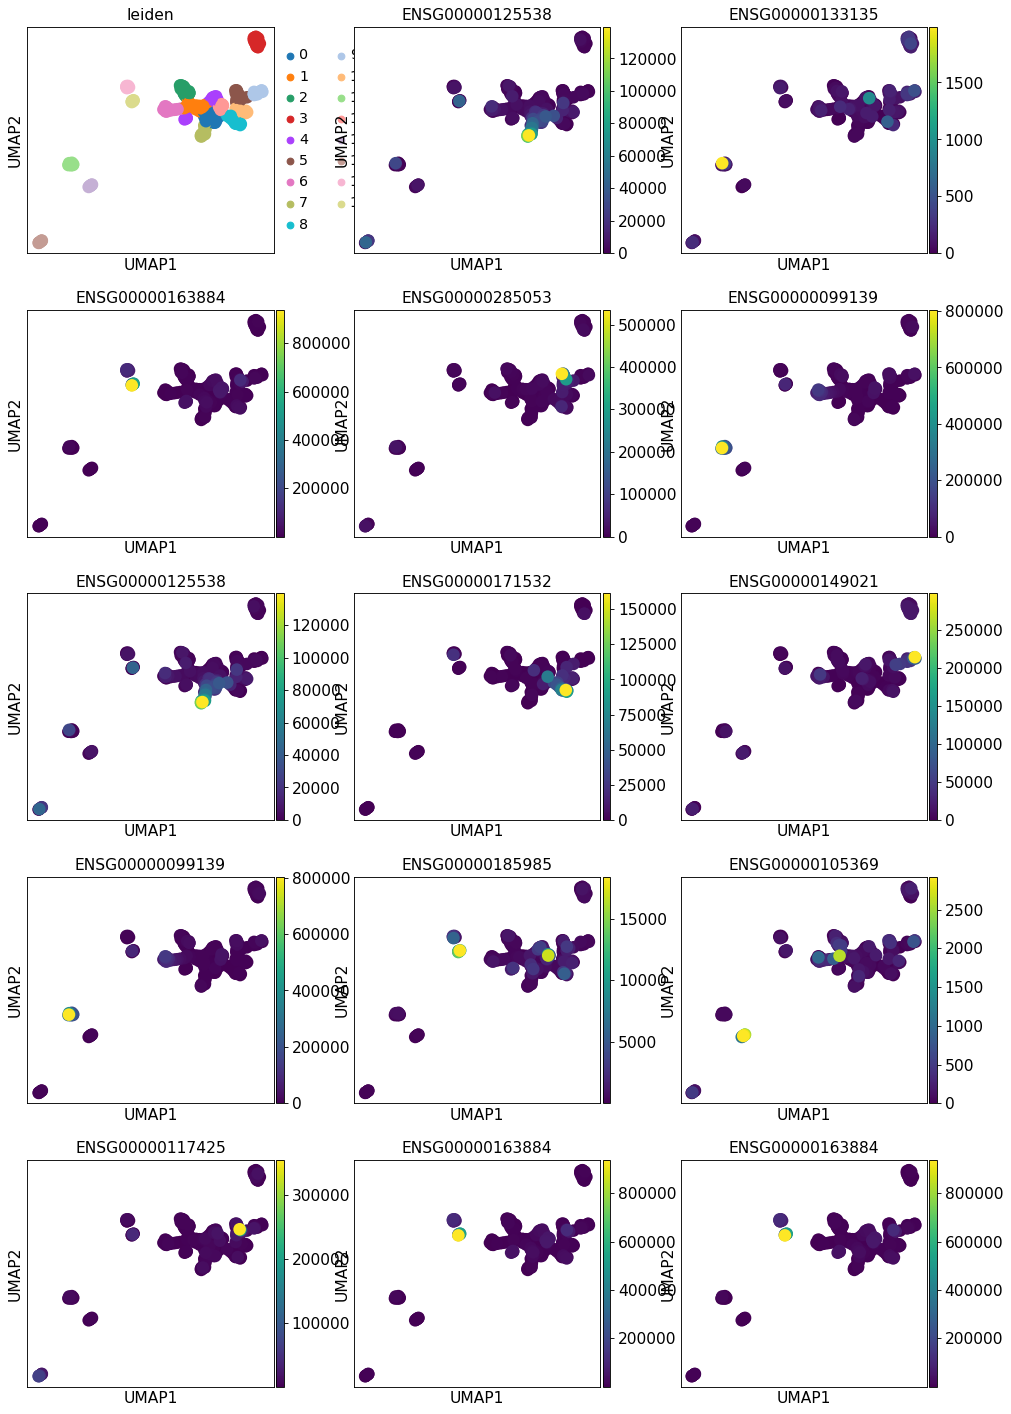

In [ ]:
print("Top genes for clusters")
sc.pl.umap(adata, color=["leiden"] + [g for g in hvgs], ncols=3, show=show_plot, use_raw=False)

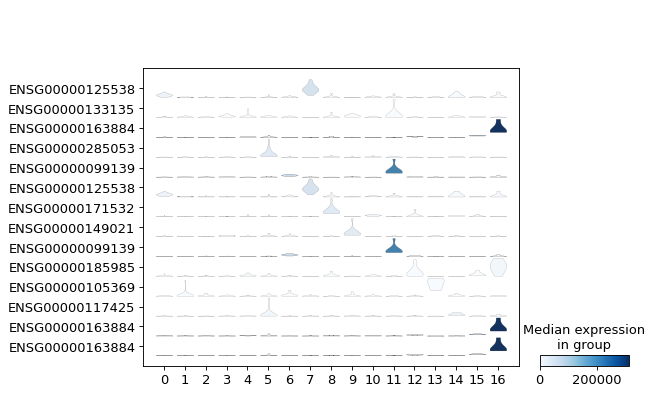

In [ ]:
sc.pl.stacked_violin(adata, var_names=hvgs, groupby='leiden', num_categories=17, use_raw=False,swap_axes=True)